# 1. Preparing Notebook

Installing and importing libraries, preparing the notebook settings that will be used in this notebook.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.cluster as cluster
import sklearn.metrics as metrics
from mpl_toolkits.basemap import Basemap
from sklearn.feature_selection import SelectKBest, f_regression
from IPython.display import display
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score 
from yellowbrick.cluster import silhouette_visualizer

# 2. Reading Dataset

**Here's an explanation of each column in the USGS earthquake data:**

* **time:** The time of the earthquake, reported as the number of milliseconds since the Unix epoch (January 1, 1970, 00:00:00 UTC).
* **latitude:** The latitude of the earthquake's epicenter, reported in decimal degrees.
* **longitude:** The longitude of the earthquake's epicenter, reported in decimal degrees.
* **depth:** The depth of the earthquake, reported in kilometers.
* **mag:** The magnitude of the earthquake, reported on various magnitude scales (see magType column below).
* **magType:** The magnitude type used to report the earthquake magnitude (e.g. "mb", "ml", "mw").
* **nst:** The total number of seismic stations used to calculate the earthquake location and magnitude.
* **gap:** The largest azimuthal gap between azimuthally adjacent stations (in degrees).
* **dmin:** The distance to the nearest station in degrees.
* **rms:** The root-mean-square of the residuals of the earthquake's hypocenter location.
* **net:** The ID of the seismic network used to locate the earthquake.
* **id:** A unique identifier for the earthquake event.
* **updated:** The time when the earthquake event was most recently updated in the catalog, reported as the number of milliseconds since the Unix epoch.
* **place:** A human-readable description of the earthquake's location.
* **type:** The type of seismic event (e.g. "earthquake", "quarry blast", "explosion").
* **horizontalError:** The horizontal error, in kilometers, of the location reported in the latitude and longitude columns.
* **depthError:** The depth error, in kilometers, of the depth column.
* **magError:** The estimated standard error of the reported earthquake magnitude.
* **magNst:** The number of seismic stations used to calculate the earthquake magnitude.
* **status:** The status of the earthquake event in the USGS earthquake catalog (e.g. "reviewed", "automatic").
* **locationSource:** The ID of the agency or network that provided the earthquake location.
* **magSource:** The ID of the agency or network that provided the earthquake magnitude.

### Load dataset

In [2]:
df = pd.read_csv('Significant_Earthquakes.csv', index_col=0)
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,updated,place,type,horizontalError,depthError,magError,magNst,status,locationSource,magSource
0,1900-10-09T12:25:00.000Z,57.0900,-153.4800,NaN,7.86,mw,NaN,NaN,NaN,NaN,...,2022-05-09T14:44:17.838Z,"16 km SW of Old Harbor, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,pt
1,1901-03-03T07:45:00.000Z,36.0000,-120.5000,NaN,6.40,ms,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"12 km NNW of Parkfield, California",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,ell
2,1901-07-26T22:20:00.000Z,40.8000,-115.7000,NaN,5.00,fa,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"6 km SE of Elko, Nevada",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,sjg
3,1901-12-30T22:34:00.000Z,52.0000,-160.0000,NaN,7.00,ms,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,south of Alaska,earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
4,1902-01-01T05:20:30.000Z,52.3800,-167.4500,NaN,7.00,ms,NaN,NaN,NaN,NaN,...,2018-06-04T20:43:44.000Z,"113 km ESE of Nikolski, Alaska",earthquake,NaN,NaN,NaN,NaN,reviewed,ushis,abe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96110,2023-03-11T04:03:47.848Z,1.9672,97.9366,44.501,5.30,mww,109.0,55.0,0.751,0.72,...,2023-03-31T02:08:57.884Z,"39 km SSE of Singkil, Indonesia",earthquake,8.49,4.610,0.086,13.0,reviewed,us,us
96111,2023-03-11T02:35:28.458Z,-45.6618,-77.2974,10.000,5.00,mwr,39.0,142.0,2.715,0.61,...,2023-03-30T23:29:35.040Z,"Off the coast of Aisen, Chile",earthquake,9.27,1.913,NaN,NaN,reviewed,us,guc
96112,2023-03-08T13:43:23.060Z,11.4068,141.4394,10.000,5.40,mww,87.0,47.0,3.990,0.58,...,2023-04-02T13:53:27.975Z,"207 km NNE of Fais, Micronesia",earthquake,7.46,1.594,0.061,26.0,reviewed,us,us
96113,2023-03-07T06:02:30.778Z,7.4937,126.0146,11.417,5.90,mww,122.0,41.0,0.603,0.62,...,2023-04-02T03:13:59.319Z,"Mindanao, Philippines",earthquake,7.58,3.077,0.059,28.0,reviewed,us,us


# 3. Exploratory Data Analysis

In [3]:
#Check shape
df.shape

(96115, 22)

In [4]:
#Check variables type
df.dtypes

time                object
latitude           float64
longitude          float64
depth              float64
mag                float64
magType             object
nst                float64
gap                float64
dmin               float64
rms                float64
net                 object
id                  object
updated             object
place               object
type                object
horizontalError    float64
depthError         float64
magError           float64
magNst             float64
status              object
locationSource      object
magSource           object
dtype: object

In [5]:
#Check dataset description
df.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst
count,96115.000000,96115.000000,95830.000000,96115.000000,25552.000000,35847.000000,15909.000000,67374.000000,14534.000000,46406.000000,29184.000000,36174.000000
mean,3.563711,40.691301,62.450977,5.456296,166.031739,62.424166,4.285599,0.976135,7.606509,8.450930,0.189006,51.460082
std,30.083694,121.858153,108.664042,0.486570,133.639446,38.834914,5.281175,0.381032,4.893094,11.237023,0.160968,75.903997
min,-77.080000,-179.997000,-4.000000,5.000000,0.000000,6.500000,0.001376,-1.000000,0.042000,-1.000000,0.000000,0.000000
25%,-17.732750,-72.197000,14.400000,5.100000,67.000000,35.100000,1.222000,0.840000,5.900000,2.900000,0.063000,11.000000
50%,-1.035500,99.480000,33.000000,5.300000,125.000000,54.000000,2.583000,0.990000,7.300000,5.100000,0.200000,26.000000
75%,29.645000,142.769500,51.000000,5.700000,228.000000,79.000000,5.167000,1.100000,9.000000,10.600000,0.250000,58.000000
max,87.386000,180.000000,700.000000,9.500000,929.000000,360.000000,50.901000,69.320000,99.000000,1091.900000,1.840000,941.000000


### Extra data points: Obtain year, month and day columns

In [6]:
# Convert the time column to datetime format
df['time'] = pd.to_datetime(df['time'])

# Extract year, month, day into separate columns
df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month
df['day'] = df['time'].dt.day
df

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,...,horizontalError,depthError,magError,magNst,status,locationSource,magSource,year,month,day
0,1900-10-09 12:25:00+00:00,57.0900,-153.4800,NaN,7.86,mw,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,reviewed,ushis,pt,1900,10,9
1,1901-03-03 07:45:00+00:00,36.0000,-120.5000,NaN,6.40,ms,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,reviewed,ushis,ell,1901,3,3
2,1901-07-26 22:20:00+00:00,40.8000,-115.7000,NaN,5.00,fa,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,reviewed,ushis,sjg,1901,7,26
3,1901-12-30 22:34:00+00:00,52.0000,-160.0000,NaN,7.00,ms,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,reviewed,ushis,abe,1901,12,30
4,1902-01-01 05:20:30+00:00,52.3800,-167.4500,NaN,7.00,ms,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,reviewed,ushis,abe,1902,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
96110,2023-03-11 04:03:47.848000+00:00,1.9672,97.9366,44.501,5.30,mww,109.0,55.0,0.751,0.72,...,8.49,4.610,0.086,13.0,reviewed,us,us,2023,3,11
96111,2023-03-11 02:35:28.458000+00:00,-45.6618,-77.2974,10.000,5.00,mwr,39.0,142.0,2.715,0.61,...,9.27,1.913,NaN,NaN,reviewed,us,guc,2023,3,11
96112,2023-03-08 13:43:23.060000+00:00,11.4068,141.4394,10.000,5.40,mww,87.0,47.0,3.990,0.58,...,7.46,1.594,0.061,26.0,reviewed,us,us,2023,3,8
96113,2023-03-07 06:02:30.778000+00:00,7.4937,126.0146,11.417,5.90,mww,122.0,41.0,0.603,0.62,...,7.58,3.077,0.059,28.0,reviewed,us,us,2023,3,7


### Earthquakes Over Time

#### Earthquake Occurences By Year

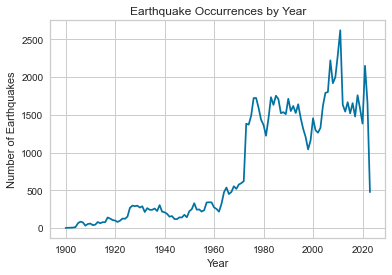

In [72]:
# Group the data by year and count the occurrences
earthquake_counts = df['year'].value_counts().sort_index()

# Create a line graph
plt.plot(earthquake_counts.index, earthquake_counts.values)

# Set the labels and title
plt.xlabel('Year')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquake Occurrences by Year')

# Display the line graph
plt.show()

Graph above represents the Earthquake Occurrences by Year. Based on the graph, we can observe that the frequency of earthquakes has been increasing since the early 1900s, which could be due to better detection technology and population growth in seismically active areas. We also can observe that earthquake occurrences are at peak from the year 2000 and above.

#### Earthquakes Occurences by Month

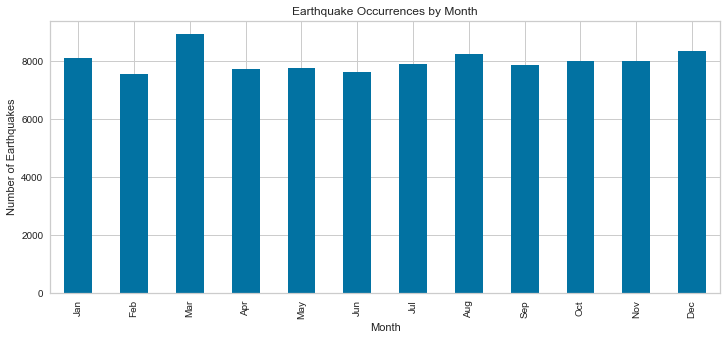

In [9]:
# Calculate the count of earthquakes for each month
earthquakes_by_month = df['month'].value_counts().sort_index()

# Plot the count of earthquakes by month
earthquakes_by_month.plot(kind='bar', figsize=(12, 5))
plt.xlabel('Month')
plt.ylabel('Number of Earthquakes')
plt.title('Earthquake Occurrences by Month')
plt.xticks(range(0, 12), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()

Graph above represents the Earthquake Occurrences by Month. Based on the graph, we can observe that there is no obvious pattern in frequency of the earthquakes based on months. The highest amount of earthquake occurrences is in March since 1900. Meanwhile, the lowest amount of earthquake occurrences is in February. Overall, the amount of earthquakes is distributed and occurred with quite a balanced amount.

### Density Distribution of Earthquake Magnitude

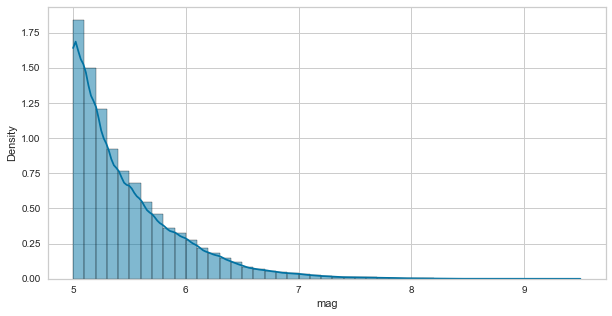

In [10]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='mag', stat='density', binwidth=.1, kde=True)
plt.show()

This plot shows the density distribution of earthquake magnitudes since 1900. The distribution is highly skewed to the left, indicating that the majority of earthquakes had a magnitude closer to 5, while only a few are very strong. The plot also reveals that the distribution follows a logarithmic scale, which means that an increase in magnitude by one unit corresponds to a ten-fold increase in the strength of the earthquake. The distribution curve helps us understand the frequency and severity of earthquakes around the world.

### Density Distribution of Earthquake Depth

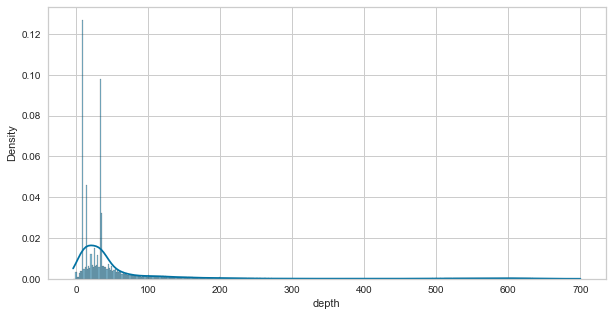

In [11]:
plt.figure(figsize=(10, 5))
sns.histplot(data=df, x='depth', stat='density', kde=True)
plt.show()

This plot shows the density distribution of earthquake depths since 1900. The distribution is also highly skewed to the left, indicating that the majority of earthquakes occur at shallow depths, while only a few occur at deeper depths. The plot reveals that most earthquakes occur within the first 100 kilometers of the Earth's crust. However, some regions, such as the Ring of Fire, experience more frequent and stronger earthquakes at greater depths. The distribution curve helps us understand the spatial and temporal patterns of earthquakes around the world.

### Handle null & missing values

#### Boxplot for outliers

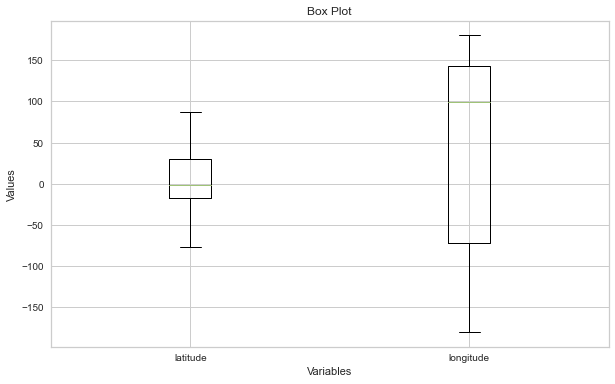

In [13]:
#Boxplot of latitude and longitude
selected_variables = ['latitude', 'longitude']

# Create a box plot using matplotlib
plt.figure(figsize=(10, 6))  # Set the size of the figure
plt.boxplot(df[selected_variables].values, labels=selected_variables)

# Add title and labels to the plot
plt.title('Box Plot')
plt.xlabel('Variables')
plt.ylabel('Values')

# Display the plot
plt.show()

In [14]:
#Construct new dataframe
newdf = df[['latitude','longitude','depth','mag']]
#Check null value
newdf.isnull().sum()

latitude       0
longitude      0
depth        285
mag            0
dtype: int64

In [15]:
#Fill null values with interpolate method
newdf['depth'] = newdf['depth'].interpolate()
newdf = newdf.dropna()

#Check null values again
newdf.isnull().sum()
newdf

C:\Users\waiee\AppData\Local\Temp\ipykernel_25088\3588873121.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  newdf['depth'] = newdf['depth'].interpolate()


,latitude,longitude,depth,mag
16,41.7580,23.2490,15.000,7.02
17,41.8020,23.1080,15.000,6.84
18,52.7630,160.2770,30.000,7.70
19,51.4240,161.6380,15.000,7.50
20,30.6840,100.6080,15.000,7.09
...,...,...,...,...
96110,1.9672,97.9366,44.501,5.30
96111,-45.6618,-77.2974,10.000,5.00
96112,11.4068,141.4394,10.000,5.40
96113,7.4937,126.0146,11.417,5.90


### Correlation Analysis

In [16]:
# Check correlation
corr = newdf.corr()
display(corr)

,latitude,longitude,depth,mag
latitude,1.000000,0.196508,-0.120223,0.052846
longitude,0.196508,1.000000,-0.084550,0.000063
depth,-0.120223,-0.084550,1.000000,-0.023596
mag,0.052846,0.000063,-0.023596,1.000000


In [17]:
# Check correlation
corr2 = df.corr()
display(corr2)

,latitude,longitude,depth,mag,nst,gap,dmin,rms,horizontalError,depthError,magError,magNst,year,month,day
latitude,1.000000,0.196161,-0.119337,0.053191,0.364007,0.006458,-0.359643,-0.078502,-0.165554,0.048592,0.195305,0.197581,-0.198069,-0.002403,0.004131
longitude,0.196161,1.000000,-0.086039,-0.000241,0.011116,-0.199506,-0.133076,-0.016028,-0.074833,0.019147,0.045102,-0.013194,-0.012139,0.000577,-0.002086
depth,-0.119337,-0.086039,1.000000,-0.023608,0.175635,-0.151924,-0.075343,-0.021000,0.047996,-0.038504,-0.067886,0.023959,0.038306,0.003768,0.001537
mag,0.053191,-0.000241,-0.023608,1.000000,0.555641,-0.312562,-0.028754,0.049592,-0.057548,0.174584,0.460657,-0.002375,-0.397696,0.009749,-0.004123
nst,0.364007,0.011116,0.175635,0.555641,1.000000,-0.439349,0.020431,-0.036446,-0.108385,-0.281158,-0.380680,0.720906,0.086417,0.003010,0.004332
gap,0.006458,-0.199506,-0.151924,-0.312562,-0.439349,1.000000,-0.010372,0.036069,0.244708,0.311398,0.353994,-0.139586,-0.288837,-0.019585,0.001170
dmin,-0.359643,-0.133076,-0.075343,-0.028754,0.020431,-0.010372,1.000000,-0.029352,0.280414,-0.131632,0.085171,-0.032599,0.076195,0.006206,0.002627
rms,-0.078502,-0.016028,-0.021000,0.049592,-0.036446,0.036069,-0.029352,1.000000,0.237087,0.054983,-0.044810,-0.092000,-0.191734,0.002501,0.004350
horizontalError,-0.165554,-0.074833,0.047996,-0.057548,-0.108385,0.244708,0.280414,0.237087,1.000000,0.293025,0.210628,-0.014407,-0.178697,0.005941,-0.005756
depthError,0.048592,0.019147,-0.038504,0.174584,-0.281158,0.311398,-0.131632,0.054983,0.293025,1.000000,0.437014,-0.169705,-0.403298,0.000160,0.010686


### Heatmap correlation between variables

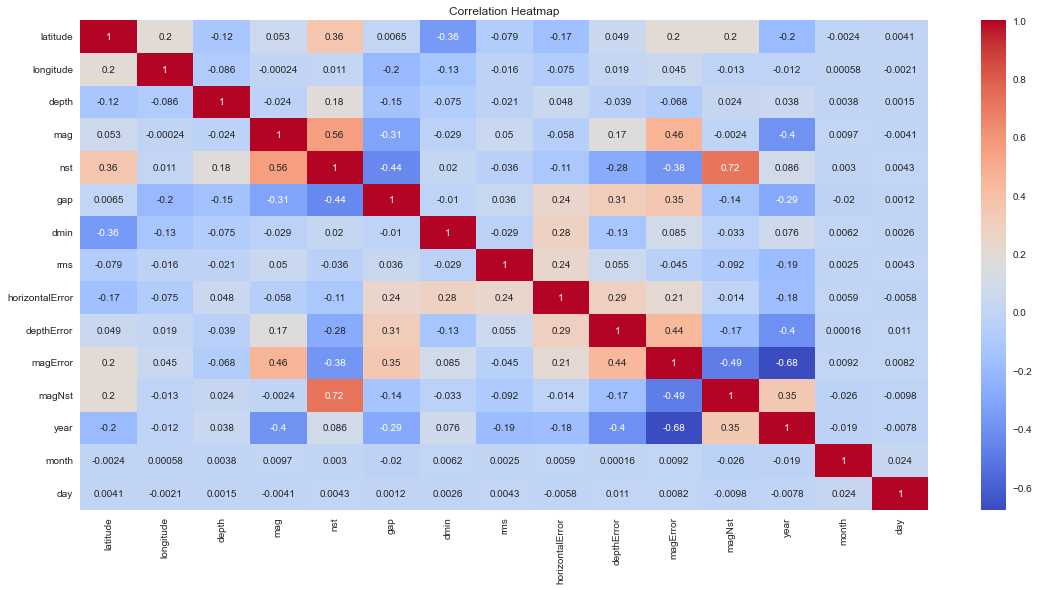

In [18]:
corr_matrix = df.corr()
plt.figure(figsize=(19,9))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

#### Heatmap correlation between variables in new dataframe

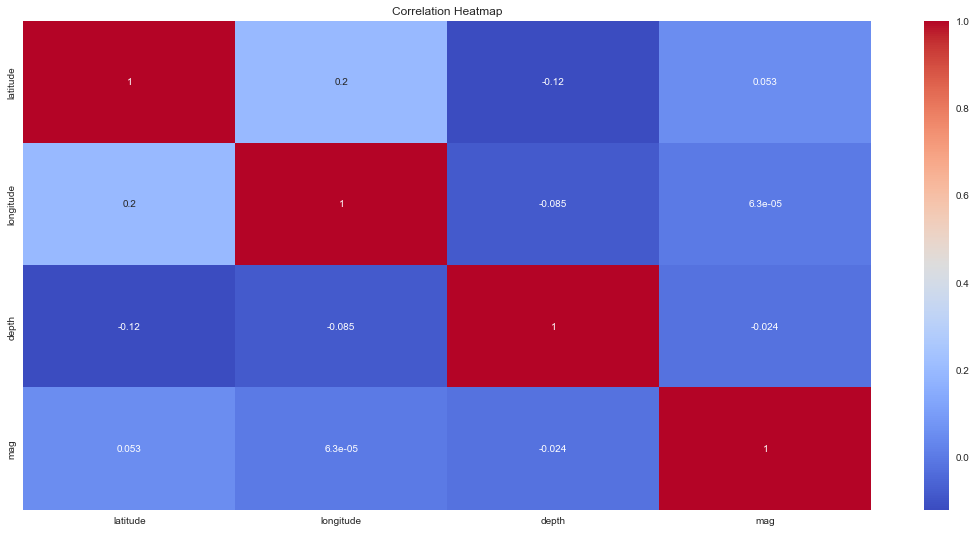

In [19]:
#Correlation of new dataframe
# sns.heatmap(corr, cmap='viridis',square=True)

matrix = newdf.corr()
plt.figure(figsize=(19,9))
sns.heatmap(matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

### Univariate Feature Selection

In [20]:
x1 = newdf.drop('latitude', axis=1)  # Replace 'target_variable' with the actual name of your target variable column
y1 = newdf['latitude']
selector = SelectKBest(score_func=f_regression, k=3)  # Replace 'k' with the desired number of top features to select
X_selected = selector.fit_transform(x1, y1)
selected_feature_indices = selector.get_support(indices=True)
selected_features = x1.columns[selected_feature_indices]
print(selected_features)

Index(['longitude', 'depth', 'mag'], dtype='object')


# 3. Find optimal number of K

We used two methods: Elbow Method & Silhouette Method to find the best number of clusters(k)

In [21]:
from sklearn.preprocessing import StandardScaler  # For scaling dataset
from sklearn.cluster import KMeans, AgglomerativeClustering, AffinityPropagation

## Elbow Method

In [22]:
#Feature scaling to normalize data
ss = StandardScaler()
X = ss.fit_transform(newdf)

#We run cluster analysis using Cluster as 1 until 12. Also, we store the WSS scores.
#The WSS score will be used to create the Elbow Plot 
#WSS = Within-Cluster-Sum of Squared

K = range(1,12)
wss = []
for k in K:
    kmeans=cluster.KMeans(n_clusters=k,init="k-means++")
    kmeans=kmeans.fit(X)
    wss_iter = kmeans.inertia_
    wss.append(wss_iter)

C:\Users\waiee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\waiee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\waiee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\waiee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

###  Store the number of clusters along with their WSS scores in a DataFrame

In [23]:
centers = pd.DataFrame({'Clusters': K, 'WSS': wss})
centers

,Clusters,WSS
0,1,384396.000000
1,2,291903.101655
2,3,220725.872445
3,4,171718.438613
4,5,137601.040737
5,6,117791.592664
6,7,108115.550303
7,8,99808.421770
8,9,92274.512868
9,10,84761.004506


### Plot the Elbow Plot

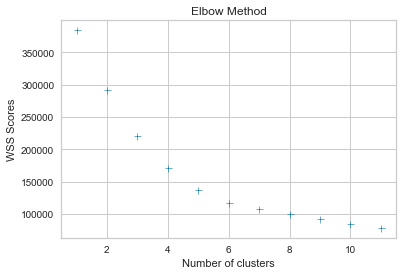

In [24]:
sns.scatterplot(x = 'Clusters', y = 'WSS', data = centers, marker="+")
plt.xlabel('Number of clusters')
plt.ylabel('WSS Scores')
plt.title('Elbow Method')
plt.show()

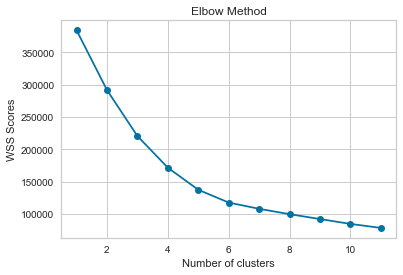

In [25]:
plt.plot(range(1, 12), wss, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WSS Scores')
plt.title('Elbow Method')
plt.show()

## Silhouette Method

C:\Users\waiee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\waiee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\waiee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\waiee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value 

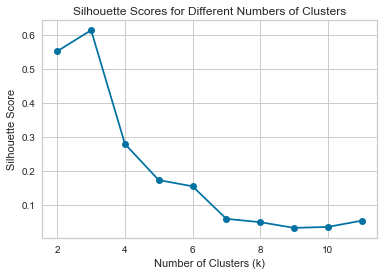

In [26]:
# for i in range(2,12):
#     labels = cluster.KMeans(n_clusters=i,init="k-means++", random_state=200).fit(X).labels_
#     print("Silhouette score for k(clusters): " + str(i) + " is "
#          + str(metrics.silhouette_score(newdf, labels,metric="euclidean",sample_size=1000,random_state=200)))

s_scores = []
k_values = range(2, 12)

for k in k_values:
    labels = cluster.KMeans(n_clusters=k, init="k-means++", random_state=200).fit(X).labels_
    s_score = metrics.silhouette_score(newdf, labels, metric="euclidean", sample_size=1000, random_state=200)
    s_scores.append(s_score)

# Plot the silhouette scores
plt.plot(k_values, s_scores, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Scores for Different Numbers of Clusters')
plt.show()


In [27]:
# Construct the table with number of clusters and silhouette scores
table_data = list(zip(k_values, s_scores))
table = pd.DataFrame(table_data, columns=['Number of Clusters (k)', 'Silhouette Score'])

# Display the table
table

,Number of Clusters (k),Silhouette Score
0,2,0.550902
1,3,0.612689
2,4,0.278193
3,5,0.171888
4,6,0.153640
5,7,0.057935
6,8,0.048136
7,9,0.031390
8,10,0.034144
9,11,0.052529


# 4. K-Means Clustering

In [28]:
kmeans = cluster.KMeans(n_clusters=2, init="k-means++")
kmeans = kmeans.fit(X)

C:\Users\waiee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Plot chart

In [1]:
newdf2 = newdf.copy()
newdf['clusters'] = kmeans.labels_
newdf

NameError: name 'newdf' is not defined

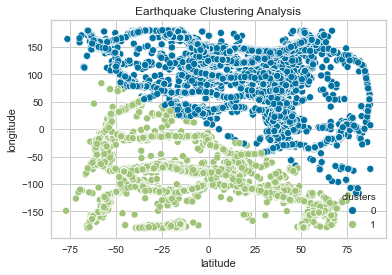

In [30]:
sns.scatterplot(x="latitude", y="longitude", hue="clusters", data=newdf)
plt.title('Earthquake Clustering Analysis')
plt.show()

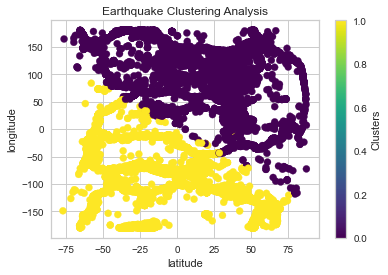

In [31]:
plt.scatter(newdf['latitude'], newdf['longitude'], c=newdf['clusters'], cmap='viridis')
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title('Earthquake Clustering Analysis')
plt.colorbar(label='Clusters')
plt.show()

## Silhouette Coefficient

In [32]:
#Calculate silhoutte score
sc1 = silhouette_score(newdf, newdf['clusters'])
print("Silhouette Score (n=2) = ", sc1)

Silhouette Score (n=2) =  0.5599877167274391


C:\Users\waiee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


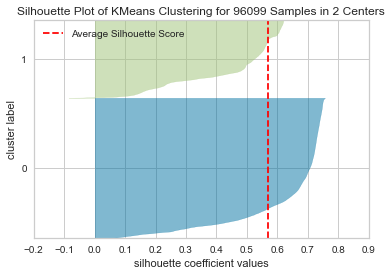

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 96099 Samples in 2 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=2, random_state=12))

In [33]:
silhouette_visualizer(KMeans(2, random_state=12), newdf, colors='yellowbrick')

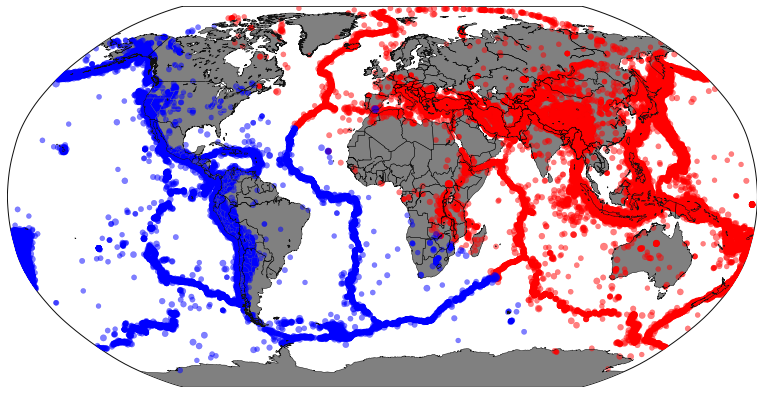

In [34]:
# Create a new map
fig = plt.figure(figsize=(14, 7))
map = Basemap(projection='robin', resolution='l', area_thresh=1000.0, lat_0=0, lon_0=0)

# Draw coastlines, country boundaries, and fill the continents
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='gray')

# Convert latitude and longitude to map coordinates
x, y = map(newdf["longitude"].values, newdf["latitude"].values)

# Get cluster labels from your clustering result
cluster_labels = newdf['clusters']  # Replace with the actual cluster labels from your dataframe

# Define a colormap for differentiating clusters
cluster_colors = {0: 'red', 1: 'blue'}  # Customize the colors and labels based on your clustering results

# Plot the data points for each cluster with different colors
for label in set(cluster_labels):
    cluster_data = newdf[cluster_labels == label]
    x_cluster, y_cluster = map(cluster_data["longitude"].values, cluster_data["latitude"].values)
    map.scatter(x_cluster, y_cluster, s=cluster_data["mag"].values**2, c=cluster_colors[label], alpha=0.5)

# Draw country boundaries
map.drawcountries(linewidth=0.5, linestyle='solid', color='black')

# Draw state boundaries within countries
map.drawstates(linewidth=0.2, linestyle='solid', color='gray')

# Show the map
plt.show()

## Final dataframe

In [64]:
newdf.reset_index(drop=True, inplace=True)
newdf

,latitude,longitude,depth,mag,clusters
0,41.7580,23.2490,15.000,7.02,0
1,41.8020,23.1080,15.000,6.84,0
2,52.7630,160.2770,30.000,7.70,0
3,51.4240,161.6380,15.000,7.50,0
4,30.6840,100.6080,15.000,7.09,0
...,...,...,...,...,...
96094,1.9672,97.9366,44.501,5.30,0
96095,-45.6618,-77.2974,10.000,5.00,1
96096,11.4068,141.4394,10.000,5.40,0
96097,7.4937,126.0146,11.417,5.90,0


In [65]:
#Compare mean magnitude and mean depth
cluster_0_data = newdf[newdf['clusters'] == 0]
cluster_1_data = newdf[newdf['clusters'] == 1]
cluster_0_mean_magnitude = cluster_0_data['mag'].mean()
cluster_1_mean_magnitude = cluster_1_data['mag'].mean()

print("Comparison of Clusters Labels: ")
if cluster_0_mean_magnitude > cluster_1_mean_magnitude:
    print("Cluster 0 has a higher mean magnitude.")
else:
    print("Cluster 1 has a higher mean magnitude.")
    
cluster_0_mean_depth = cluster_0_data['depth'].mean()
cluster_1_mean_depth = cluster_1_data['depth'].mean()

if cluster_0_mean_depth > cluster_1_mean_depth:
    print("Cluster 0 has a higher mean depth.")
else:
    print("Cluster 1 has a higher mean depth.")

Comparison of Clusters Labels: 
Cluster 1 has a higher mean magnitude.
Cluster 1 has a higher mean depth.


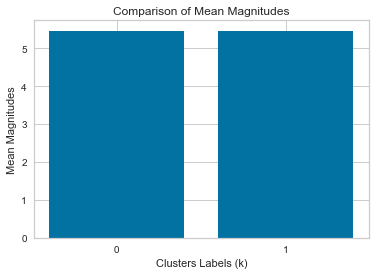

In [66]:
# Define the mean magnitude
sl = [cluster_0_mean_magnitude, cluster_1_mean_magnitude]
labels = ['0', '1']  # Replace with the labels for each mean magnitude

# Plot the silhouette scores
plt.bar(labels, sl)
plt.xlabel('Clusters Labels (k)')
plt.ylabel('Mean Magnitudes')
plt.title('Comparison of Mean Magnitudes')
# plt.ylim(0,10)  # Set the y-axis limits if needed
plt.show()

In [69]:
print(cluster_0_mean_magnitude)
print(cluster_1_mean_magnitude)

5.453090283336001
5.461928395135152


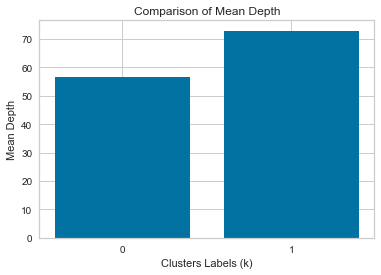

In [67]:
# Define the mean depth
sl2 = [cluster_0_mean_depth, cluster_1_mean_depth]
labels2 = ['0', '1']  # Replace with the labels for each mean magnitude

# Plot the silhouette scores
plt.bar(labels2, sl2)
plt.xlabel('Clusters Labels (k)')
plt.ylabel('Mean Depth')
plt.title('Comparison of Mean Depth')
# plt.ylim(0, 1)  # Set the y-axis limits if needed
plt.show()

In [70]:
print(cluster_0_mean_depth)
print(cluster_1_mean_depth)

56.677855162478004
72.87603063277942


### Comparing with second model when k=3

In [37]:
#Second model when k=3
kmeans2 = cluster.KMeans(n_clusters=3, init="k-means++")
kmeans2 = kmeans2.fit(X)

C:\Users\waiee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [38]:
newdf2['clusters'] = kmeans2.labels_
newdf2

,latitude,longitude,depth,mag,clusters
16,41.7580,23.2490,15.000,7.02,0
17,41.8020,23.1080,15.000,6.84,0
18,52.7630,160.2770,30.000,7.70,0
19,51.4240,161.6380,15.000,7.50,0
20,30.6840,100.6080,15.000,7.09,0
...,...,...,...,...,...
96110,1.9672,97.9366,44.501,5.30,0
96111,-45.6618,-77.2974,10.000,5.00,1
96112,11.4068,141.4394,10.000,5.40,0
96113,7.4937,126.0146,11.417,5.90,0


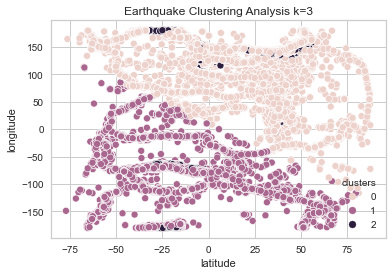

In [39]:
sns.scatterplot(x="latitude", y="longitude", hue="clusters", data=newdf2)
plt.title('Earthquake Clustering Analysis k=3')
plt.show()

In [40]:
#Calculate silhoutte score
sc2 = silhouette_score(newdf2, newdf2['clusters'])
print("Silhouette Score (n=3) = ", sc2)

Silhouette Score (n=3) =  0.6128898839457326


C:\Users\waiee\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


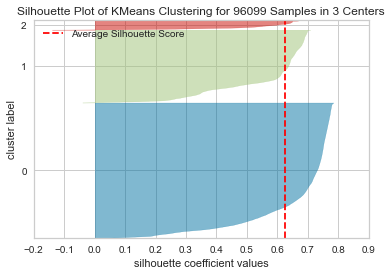

SilhouetteVisualizer(ax=<AxesSubplot:title={'center':'Silhouette Plot of KMeans Clustering for 96099 Samples in 3 Centers'}, xlabel='silhouette coefficient values', ylabel='cluster label'>,
                     colors='yellowbrick',
                     estimator=KMeans(n_clusters=3, random_state=12))

In [41]:
silhouette_visualizer(KMeans(3, random_state=12), newdf2, colors='yellowbrick')

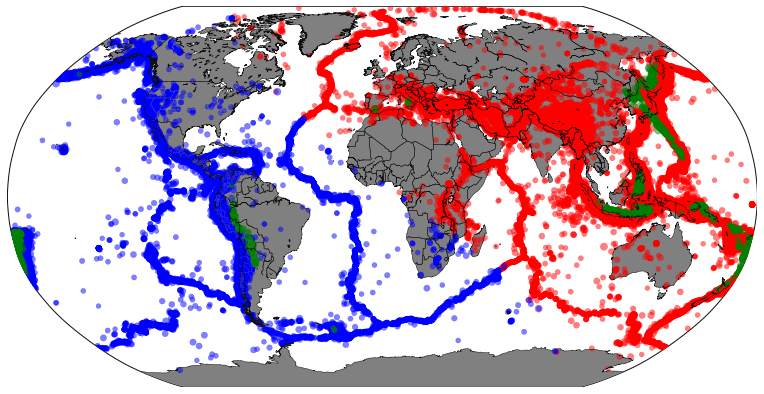

In [42]:
# Create a new map
fig = plt.figure(figsize=(14, 7))
map = Basemap(projection='robin', resolution='l', area_thresh=1000.0, lat_0=0, lon_0=0)

# Draw coastlines, country boundaries, and fill the continents
map.drawcoastlines(linewidth=0.5)
map.drawcountries(linewidth=0.25)
map.fillcontinents(color='gray')

# Convert latitude and longitude to map coordinates
x, y = map(newdf2["longitude"].values, newdf2["latitude"].values)

# Get cluster labels from your clustering result
cluster_labels = newdf2['clusters']  # Replace with the actual cluster labels from your dataframe

# Define a colormap for differentiating clusters
cluster_colors = {0: 'red', 1: 'blue',2: 'green'}  # Customize the colors and labels based on your clustering results

# Plot the data points for each cluster with different colors
for label in set(cluster_labels):
    cluster_data = newdf2[cluster_labels == label]
    x_cluster, y_cluster = map(cluster_data["longitude"].values, cluster_data["latitude"].values)
    map.scatter(x_cluster, y_cluster, s=cluster_data["mag"].values**2, c=cluster_colors[label], alpha=0.5)

# Draw country boundaries
map.drawcountries(linewidth=0.5, linestyle='solid', color='black')

# Draw state boundaries within countries
map.drawstates(linewidth=0.2, linestyle='solid', color='gray')

# Show the map
plt.show()

In [43]:
#Compare mean magnitude and mean depth
cluster_0_data = newdf2[newdf2['clusters'] == 0]
cluster_1_data = newdf2[newdf2['clusters'] == 1]
cluster_2_data = newdf2[newdf2['clusters'] == 2]
cluster_0_mean_magnitude = cluster_0_data['mag'].mean()
cluster_1_mean_magnitude = cluster_1_data['mag'].mean()
cluster_2_mean_magnitude = cluster_2_data['mag'].mean()

print("Comparison of Clusters Labels: ")
if cluster_0_mean_magnitude > cluster_1_mean_magnitude and cluster_0_mean_magnitude > cluster_2_mean_magnitude :
    print("Cluster 0 has a higher mean magnitude.")
elif cluster_1_mean_magnitude > cluster_0_mean_magnitude and cluster_1_mean_magnitude > cluster_2_mean_magnitude :
    print("Cluster 1 has a higher mean magnitude.") 
else:
    print("Cluster 2 has a higher mean magnitude.")
    
cluster_0_mean_depth = cluster_0_data['depth'].mean()
cluster_1_mean_depth = cluster_1_data['depth'].mean()
cluster_2_mean_depth = cluster_2_data['depth'].mean()

if cluster_0_mean_depth > cluster_1_mean_depth and cluster_0_mean_depth > cluster_2_mean_depth:
    print("Cluster 0 has a higher mean depth.")
elif cluster_1_mean_depth > cluster_0_mean_depth and cluster_1_mean_depth > cluster_2_mean_depth:
    print("Cluster 1 has a higher mean depth.") 
else:
    print("Cluster 2 has a higher mean depth.")

Comparison of Clusters Labels: 
Cluster 2 has a higher mean magnitude.
Cluster 2 has a higher mean depth.


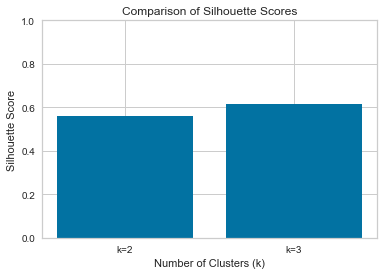

In [55]:
# Define the silhouette scores
sl = [sc1, sc2] # Replace with your actual silhouette scores
labels = ['k=2', 'k=3']  # Replace with the labels for each silhouette score

# Plot the silhouette scores
plt.bar(labels, sl)
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Silhouette Score')
plt.title('Comparison of Silhouette Scores')
plt.ylim(0, 1)  # Set the y-axis limits if needed
plt.show()


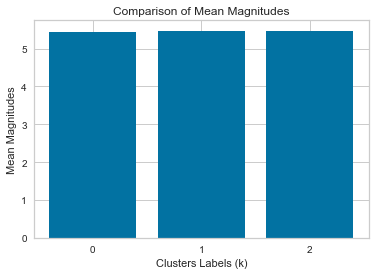

In [56]:
# Define the mean magnitude
sl = [cluster_0_mean_magnitude, cluster_1_mean_magnitude, cluster_2_mean_magnitude ]
labels = ['0', '1', '2']  # Replace with the labels for each mean magnitude

# Plot the silhouette scores
plt.bar(labels, sl)
plt.xlabel('Clusters Labels (k)')
plt.ylabel('Mean Magnitudes')
plt.title('Comparison of Mean Magnitudes')
# plt.ylim(0,10)  # Set the y-axis limits if needed
plt.show()

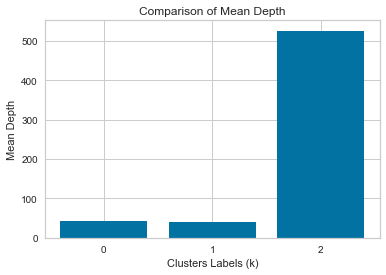

In [57]:
# Define the mean depth
sl2 = [cluster_0_mean_depth, cluster_1_mean_depth, cluster_2_mean_depth]
labels2 = ['0', '1', '2']  # Replace with the labels for each mean magnitude

# Plot the silhouette scores
plt.bar(labels2, sl2)
plt.xlabel('Clusters Labels (k)')
plt.ylabel('Mean Depth')
plt.title('Comparison of Mean Depth')
# plt.ylim(0, 1)  # Set the y-axis limits if needed
plt.show()